##Shubham Kothiya
### Regression with deep learning

In [ ]:
"""
Step 1: Import Required Libraries
"""
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""
Step 2: Load the Auto MPG Dataset
"""
# Load dataset from URL
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]

df = pd.read_csv(data_url, names=column_names, na_values="?", comment='\t', sep="\s+", skipinitialspace=True)

# Display first few rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:

"""
Step 3: Understanding the Data
"""
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check column data types
print("\nColumn Data Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Dataset contains 398 rows and 8 columns.

Column Data Types:
mpg               int64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration      int64
model year        int64
origin           object
dtype: object

Missing Values in Each Column:
mpg             0
cylinders       0
displacement    6
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [ ]:
"""
Step 4: Handling Missing Values
"""
# Convert horsepower to numeric (it may have missing values as '?')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Fill missing numerical values with the median of the column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Verify that there are no missing values
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum().sum())  # Should print 0


Missing Values After Preprocessing:
0


In [ ]:
"""
Step 5: Encoding Categorical Variables
"""
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Use Label Encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

print("Categorical variables encoded successfully.")


Categorical variables encoded successfully.


In [ ]:
"""
Step 6: Splitting Features and Target Variable
"""
# Define features (X) and target variable (y)
X = df.drop(columns=["mpg"])  # Features
y = df["mpg"]  # Target variable

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Features and target variable split successfully.")

Features and target variable split successfully.


In [ ]:
"""
Step 7: Building the Regression Model
"""
# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Single neuron for regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

print("Regression model built and compiled successfully.")

Regression model built and compiled successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
"""
Step 8: Training the Model
"""
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

print("Model training complete.")

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 26.5765 - mae: 4.8755 - val_loss: 20.3156 - val_mae: 4.1608
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.6133 - mae: 3.7152 - val_loss: 8.9840 - val_mae: 2.5709
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.5599 - mae: 2.1074 - val_loss: 2.5580 - val_mae: 1.2106
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3788 - mae: 1.2413 - val_loss: 1.9811 - val_mae: 1.0286
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.7005 - mae: 1.0084 - val_loss: 1.5633 - val_mae: 0.9186
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.7379 - mae: 0.9750 - val_loss: 1.3247 - val_mae: 0.8526
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2232 - mae: 0.8258 - val_loss: 1.1462 - val_mae: 0.8041
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3115 - mae: 0.8738 - val_loss: 1.0041 - val_mae: 0.7629
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step -

In [ ]:
"""
Step 9: Evaluating the Model
"""
# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {test_mae:.4f}")

print("Model evaluation complete.")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2630 - mae: 0.4008 

Test MAE: 0.3958
Model evaluation complete.


In [ ]:
"""
Step 10: Making Predictions
"""
# Predict values
y_pred = model.predict(X_test)

# Convert predictions to a 1D array
y_pred = y_pred.flatten()

print("Predictions generated successfully.")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predictions generated successfully.


In [ ]:
"""
Step 11: Performance Metrics
"""
# Calculate Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Performance Metrics:
Mean Absolute Error (MAE): 0.3958
Mean Squared Error (MSE): 0.2640
Root Mean Squared Error (RMSE): 0.5138
R² Score: 0.9148


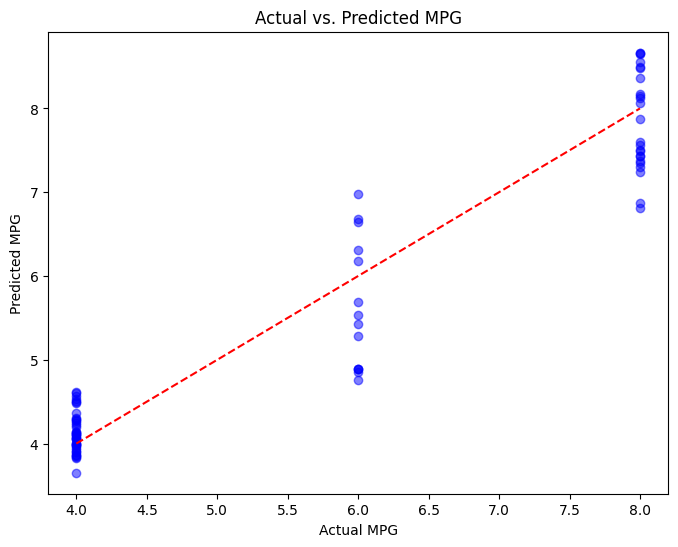

Visualization of predictions completed.


In [ ]:
"""
Step 12: Visualizing Predictions vs. Actual Values
"""
# Plot Actual vs. Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Identity line
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")
plt.show()

print("Visualization of predictions completed.")

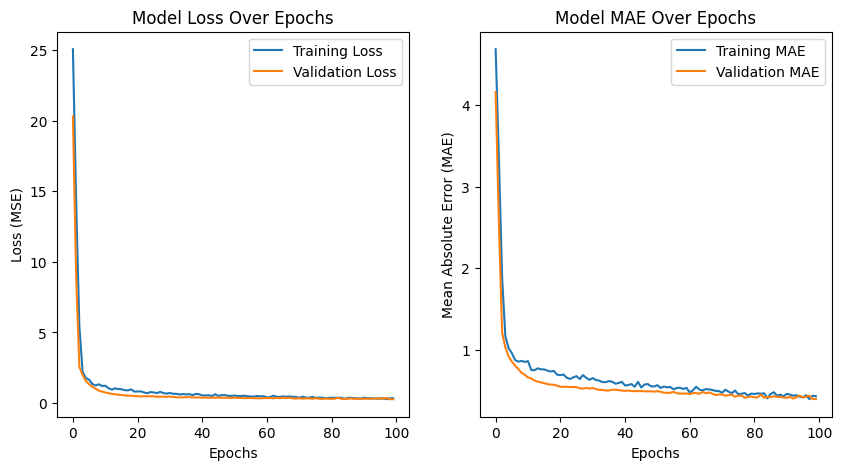

Visualization of training progress completed.


In [ ]:
"""
Step 13: Visualizing Model Training Progress
"""
# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Model Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Model MAE Over Epochs')

plt.show()

print("Visualization of training progress completed.")